In [1]:
import numpy as np
import matplotlib.pyplot as plt


rawData = np.load(r"C:\Users\harri\Desktop\Cs 437\FinalProj\data_12_07_2023_00_43_53.npy")
rawDataBaseline = np.load(r"C:\Users\harri\Desktop\Cs 437\FinalProj\data_12_06_2023_20_37_13.npy")


data = np.array([frame["adcSamples"][:, 128:] for frame in rawData])
dataBaseline = np.array([frame["adcSamples"][:, 128:] for frame in rawDataBaseline])


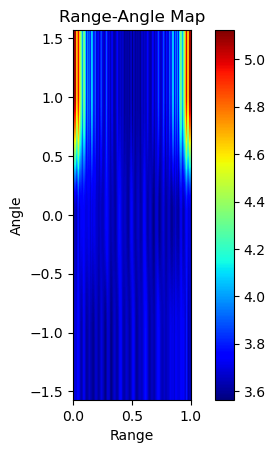

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# baseline

# Assuming data is your raw data cube: (#chirps, #antennas, #samples)

# Step 1: Pre-processing (if needed)
speed_of_light = 3e8  # Speed of light in meters/second
bandwidth = 4.4e9 # Your radar's bandwidth
range_resolution = speed_of_light / (2 * bandwidth)
max_range = range_resolution * dataBaseline.shape[2]  # Maximum range based on the number of samples
range_bins = np.linspace(0, max_range, dataBaseline.shape[2])

# Step 2: Range FFT

range_fft = np.fft.fft(dataBaseline[:,:,:], axis=2)

# range selection
range_0_1_meter = np.where((range_bins >= 0) & (range_bins <= 2.5))[0]
selected_range_fft = range_fft[:, :, range_0_1_meter]

angle_fft = np.fft.fft(range_fft, axis=1)
#angle_fft = np.fft.fftshift(angle_fft, axes=1)  # Centering the beam pattern

range_bins = range_fft[0,1,:].real

angle_bins = angle_fft[0,:,0].real

# average over chirps
angle_fft_base = np.log10(np.mean(np.abs(angle_fft[range(1,angle_fft.shape[0],2),:,:]), axis=0)+1)

extent = [0, 1, -np.pi/2, np.pi/2]
plt.imshow(angle_fft_base, cmap='jet',aspect = 'equal',extent = extent)  # Log scale for better visibility
plt.xlabel('Range')
plt.ylabel('Angle')
plt.title('Range-Angle Map')
plt.colorbar()

plt.show()



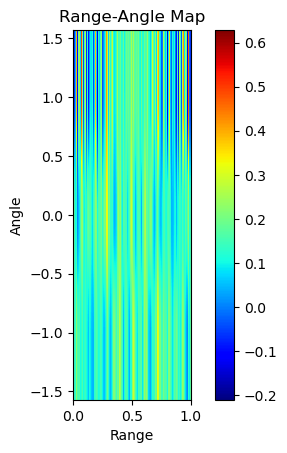

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# baseline

# Assuming data is your raw data cube: (#chirps, #antennas, #samples)

# Step 1: Pre-processing (if needed)
speed_of_light = 3e8  # Speed of light in meters/second
bandwidth = 4.4e9 # Your radar's bandwidth
range_resolution = speed_of_light / (2 * bandwidth)
max_range = range_resolution * data.shape[2]  # Maximum range based on the number of samples
range_bins = np.linspace(0, max_range, data.shape[2])

# Step 2: Range FFT

range_fft = np.fft.fft(data[:,:,:], axis=2)

# range selection
range_0_1_meter = np.where((range_bins >= 0) & (range_bins <= 2.5))[0]
selected_range_fft = range_fft[:, :, range_0_1_meter]

angle_fft = np.fft.fft(range_fft, axis=1)
#angle_fft = np.fft.fftshift(angle_fft, axes=1)  # Centering the beam pattern

range_bins = range_fft[0,1,:].real

angle_bins = angle_fft[0,:,0].real

# average over chirps
angle_fft = (np.mean(np.abs(angle_fft[range(1,angle_fft.shape[0],2),:,:]), axis=0)+1)

plt.imshow(angle_fft_base - (np.log10(angle_fft+1)), cmap='jet',aspect = 'equal',extent = extent)  # Log scale for better visibility
plt.xlabel('Range')
plt.ylabel('Angle')
plt.title('Range-Angle Map')
plt.colorbar()

plt.show()

